In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#import pandas as pd
import csv

In [2]:
G = nx.DiGraph()
with open('relac3.csv', encoding='utf8',newline='') as f:
    reader = csv.reader(f)
    relac = [tuple(row) for row in reader]

In [12]:
for i in relac: 
    G.add_edge(i[0], i[1], relac = i[2])

Spring Layout


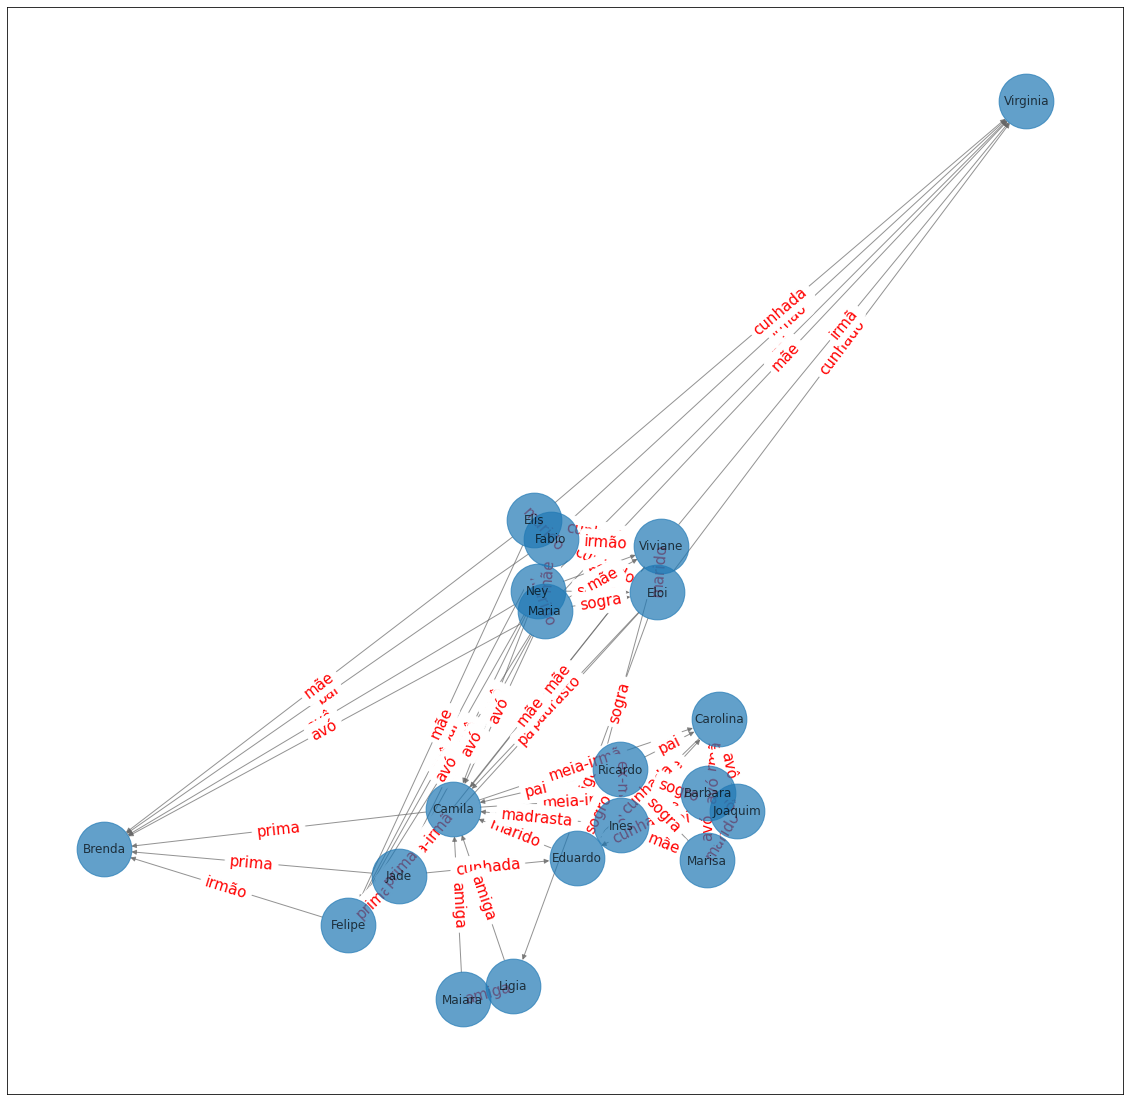

In [13]:
plt.figure(figsize =(20, 20)) 
pos = nx.spring_layout(G) 
print("Spring Layout") 
  
nx.draw_networkx(G, pos,  
                 alpha = 0.7,  
                 with_labels = True,node_size = 3000,  
                 edge_color ='.4', cmap = plt.cm.Blues) 
edge_labels = nx.get_edge_attributes(G,'relac') 
formatted_edge_labels = {(elem[0],elem[1]):edge_labels[elem] for elem in edge_labels} 
nx.draw_networkx_edge_labels(G,pos,edge_labels=formatted_edge_labels,font_color='red',font_size=15)
plt.show()

In [5]:
from pyvis.network import Network

In [45]:
nt = Network("500px", "900px", notebook = True, directed = True)
nt.from_nx(G)
nt.show("grafo.html")

# Densidade: mostra o quão conectada é a rede
A densidade da rede é a proporção de arestas existente na rede em relação a todas as arestas possíveis entre os vértices. Sendo uma proporção, esta quantidade varia entre 0 e 1, sendo que quanto mais próxima de 1 mais densa é rede.

In [16]:
nx.density(G)

0.18157894736842106

# Número de vértices

In [8]:
G.number_of_nodes()

20

# Número de arestas

In [8]:
G.number_of_edges()

69

# Vizinhos

In [17]:
#Lista somente os vértices que recebem o 'direcionamento' de Jade
list(G.neighbors('Jade'))

['Brenda', 'Felipe', 'Eduardo']

In [41]:
#Lista somente os vértices de quem 'Jade' recebe o 'direcionamento'
list(G.predecessors('Jade'))

['Viviane', 'Eloi', 'Camila', 'Maria', 'Ney']

# Grau/ordem de um vértice é o número de aresta ligada ao nó

In [18]:
G.degree['Jade']

8

# Caminho mais curto entre um vértice e outro

In [46]:
# Descobre o caminho de custo mínimo (ccm) do vértice '1' até '2' 

try:
    ccm = nx.dijkstra_path(G,source = 'Jade', target = 'Marisa')
    print('Caminho de custo mínimo: ',ccm)
except NetworkXNoPath as ex:
    print("Caminho não encontrado") 

NameError: name 'NetworkXNoPath' is not defined

# Medidas de Centralidade
Centralidade é uma medida de quão importante um vértice é no contexto de toda a rede. 

## Grau de Centralidade
São considerados mais centrais os vértices com maior quantidade de arestas, de forma que quando a rede é plotada, quanto maior o grau de um vértice, mais ao centro da rede ele estará

In [17]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('Camila', 14),
 ('Viviane', 9),
 ('Ney', 9),
 ('Maria', 9),
 ('Eloi', 8),
 ('Jade', 8),
 ('Fabio', 8),
 ('Ricardo', 7),
 ('Barbara', 7),
 ('Carolina', 7),
 ('Felipe', 7),
 ('Brenda', 7),
 ('Eduardo', 6),
 ('Ines', 6),
 ('Virginia', 6),
 ('Elis', 5),
 ('Joaquim', 5),
 ('Marisa', 5),
 ('Ligia', 3),
 ('Maiara', 2)]

In [19]:
centrality = nx.degree_centrality(G)
sorted(centrality.items(), reverse= True, key=lambda x: x[1])[:5]

[('Camila', 0.7368421052631579),
 ('Viviane', 0.47368421052631576),
 ('Ney', 0.47368421052631576),
 ('Maria', 0.47368421052631576),
 ('Eloi', 0.42105263157894735)]

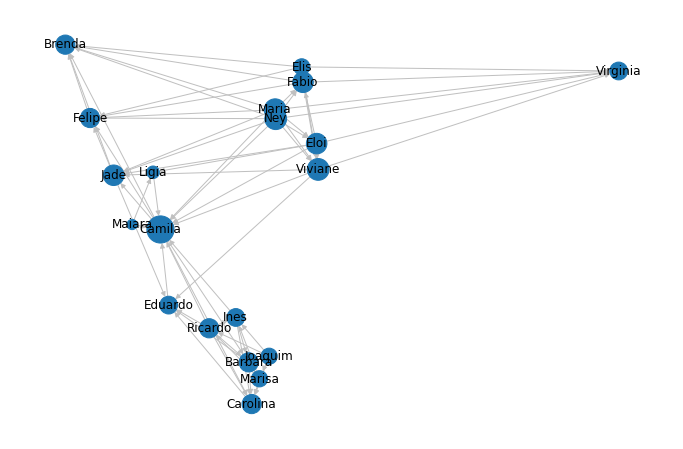

In [20]:
dg = nx.degree_centrality(G)
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 1000 for v in dg.values()], edge_color='silver')

## Closeness
Esta medida de centralidade tenta expressar a importância de um vértice pelo fato dele estar próximo a muitos outros vértices.Quanto mais central for um nó, mais próximo estará de todos os outros nós.
Mede o número de caminhos mais curtos em que o nó se encontra. Essa centralidade costuma ser usada para determinar o fluxo de informações no gráfico Quanto maior o número, mais informações fluem por ele.

In [25]:
for k, v in sorted(nx.closeness_centrality(G).items(), reverse= True, key=lambda x: x[1]):
    print(k, ':', v)

Camila : 0.5639097744360902
Brenda : 0.5167464114832535
Felipe : 0.4753289473684211
Carolina : 0.4554655870445344
Eduardo : 0.4385964912280702
Barbara : 0.42293233082706766
Jade : 0.40834845735027225
Virginia : 0.3157894736842105
Viviane : 0.21052631578947367
Elis : 0.1644736842105263
Ines : 0.15789473684210525
Fabio : 0.15789473684210525
Ligia : 0.14035087719298245
Eloi : 0.10526315789473684
Ricardo : 0.10526315789473684
Maria : 0.05263157894736842
Marisa : 0.05263157894736842
Ney : 0.0
Joaquim : 0.0
Maiara : 0.0


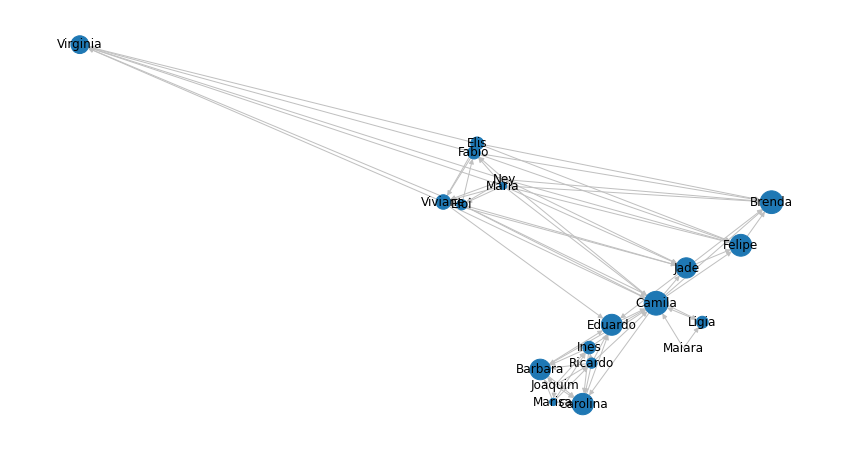

In [24]:
cc = nx.closeness_centrality(G)
plt.figure(1, figsize=(15, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 1000 for v in cc.values()], edge_color='silver')

## Betweenness
Esta medida de centralidade reconhece como mais importantes os vértices que se localizam na rede de tal forma se localizem entre outros pares de vértices.
Quantifica o número de vezes que o nó age como ponte ao longo do caminho mais curto entre dois nós.
Medida para quantificar o controle de um ser humano sobre a comunicação entre outros seres humanos numa rede social.

In [26]:
for k, v in sorted(nx.betweenness_centrality(G).items(), reverse= True, key=lambda x: x[1]):
    print(k, ':', v)

Camila : 0.1442495126705653
Eduardo : 0.03508771929824561
Viviane : 0.023391812865497075
Ricardo : 0.01364522417153996
Ines : 0.011695906432748537
Jade : 0.011208576998050682
Barbara : 0.006335282651072124
Carolina : 0.006335282651072124
Fabio : 0.006335282651072124
Eloi : 0.005847953216374269
Elis : 0.001949317738791423
Virginia : 0.0
Felipe : 0.0
Brenda : 0.0
Ney : 0.0
Maria : 0.0
Joaquim : 0.0
Marisa : 0.0
Maiara : 0.0
Ligia : 0.0


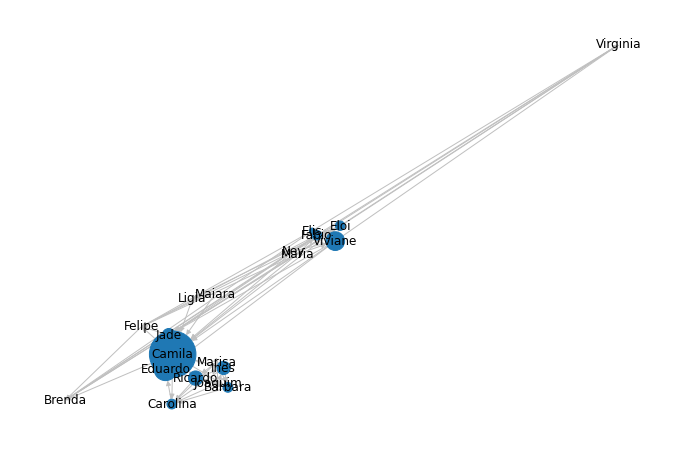

In [28]:
bc = nx.betweenness_centrality(G)
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 15000 for v in bc.values()], edge_color='silver')

## Centralidade de autovetor
Atribui maiores pesos aos vértices que estão conectados a outros vértices também importantes

In [29]:
for k, v in sorted(nx.eigenvector_centrality(G).items(), reverse= True, key=lambda x: x[1]):
    print(k, ':', v)

Brenda : 0.569405775506743
Eduardo : 0.49605178196163774
Felipe : 0.34519312046110356
Carolina : 0.34519095049070436
Camila : 0.3221924695236891
Jade : 0.20926862705392074
Barbara : 0.2092684018869013
Virginia : 1.6400237354827092e-06
Elis : 3.189889020103811e-07
Viviane : 5.4415363041625516e-08
Ines : 7.505567316086278e-09
Fabio : 7.505567316086278e-09
Ligia : 6.760967383934862e-09
Eloi : 8.041679267235296e-10
Ricardo : 8.041679267235296e-10
Maria : 5.95679945721133e-11
Marisa : 5.95679945721133e-11
Ney : 2.291076714312051e-12
Joaquim : 2.291076714312051e-12
Maiara : 2.291076714312051e-12


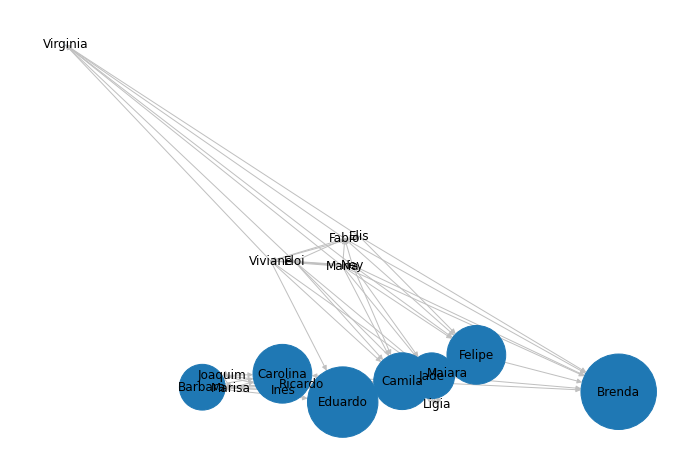

In [29]:
egvector = nx.eigenvector_centrality(G)
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 10000 for v in egvector.values()], edge_color='silver')

In [42]:
list(G.predecessors('Brenda'))

['Fabio', 'Elis', 'Felipe', 'Maria', 'Ney', 'Jade', 'Camila']

In [43]:
sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]

[('Camila', 14), ('Viviane', 9), ('Ney', 9), ('Maria', 9), ('Eloi', 8)]